## Learning objectives for this notebook
- Grouping by a feature to make summaries comparing 2 features to each other
- Interpret and apply an array of visualizations summarizing the relationship between a categorical and a number feature

Then moving toward *modeling*:
- Describe the difference between a variable and a set of observations
- Describe categorical and number variables, and the difference between them


First let's load in our data

In [1]:
import pandas as pd
import seaborn as sns
geno = pd.read_table("arabidopsis_birds/arabmagic/arabmagic_geno.csv", sep=",",skiprows=3,index_col=0)
pmap = pd.read_table("arabidopsis_birds/arabmagic/arabmagic_pmap_tair9.csv", sep=",",skiprows=3,index_col=0)
pheno = pd.read_table("arabidopsis_birds/arabmagic/arabmagic_pheno.csv", sep=",",skiprows=3,index_col=0)
counts = pd.read_table("arabidopsis_birds/eco_data/species_counts.txt")
sites = pd.read_table("arabidopsis_birds/eco_data/eco_sites.txt")
fruit_length_geno = pd.read_table("fruit_length_geno.csv",sep=",")
gwas_plus_pmap = pd.read_table("gwas_plus_pmap.csv",sep=",")

# 0. Grouping your data
You can group together observations in your dataframe using one feature and obtain summaries of the observations and the other features with `groupby`

In [7]:
gwas_plus_pmap.groupby('chr').size()

chr
1    274
2    211
3    248
4    228
5    290
dtype: int64

In [5]:
gwas_plus_pmap.groupby('chr').size().sum()

1251

Note that this gives you a new data frame or series

**How did we visualize the number of markers on a chromosome before?**

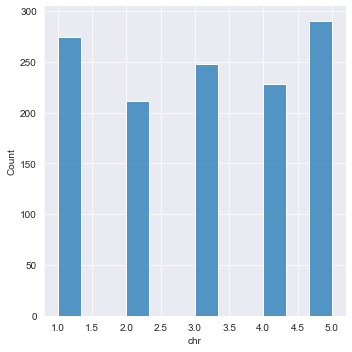

In [8]:
sns.displot(gwas_plus_pmap, x="chr")

**Exercise 0.1**: verify using vectorized operations that there are indeed 274 rows corresponding to chromosome 1

In [18]:
(gwas_plus_pmap["chr"] == 1).sum()

274

**Exercise 0.2**: using the `fruit_length_geno` data frame we made above, group by marker MASC06116 to find out how many plants there are of each genotype

In [21]:
print((fruit_length_geno["MASC06116"] == "A").sum())
print((fruit_length_geno["MASC06116"] != "A").sum())

628
49


Just like with other vectorized data frame operations, There are a number of operations you can apply to your `groupby` result data frame, including `mean` which will get the mean in each group, `min`, `max`, etc...

**Exercise 0.3**: Find the maximum value of fruit_length in the 2 genotype groups

In [34]:
fruit_length_geno.loc[:, ("MASC06116", "fruit_length")].groupby("MASC06116").max()

,fruit_length
MASC06116,
A,19.94
B,15.57


**Exercise 0.4**: Use groupby to get your Get the difference between phenotype means for the A and B genotypes of marker MASC06116. Compare this to what we previously calculated using the "apply" or the for loop.

In [45]:
fruit_length_geno.loc[:, ("MASC06116", "fruit_length")].groupby("MASC06116").mean().diff(axis= 0, periods=-1).loc["A", "fruit_length"]

2.846939428571428

In [56]:
groupab = fruit_length_geno.loc[:, ("MASC06116", "fruit_length")].groupby("MASC06116")
# group fruit length by the marker MASC06116
meanab = groupab.mean()
difab = meanab.loc["A", "fruit_length"] - meanab.loc["B", "fruit_length"]
difab

2.846939428571428

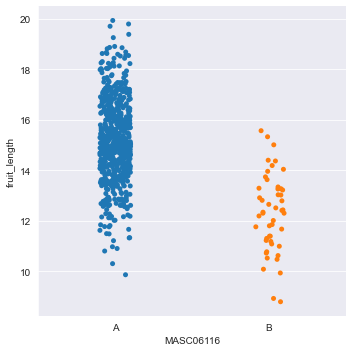

In [57]:
sns.catplot(x="MASC06116", y="fruit_length", data=fruit_length_geno)

**Exercise 1.1**: What are the axes? What are the data points? How can you interpret this plot?

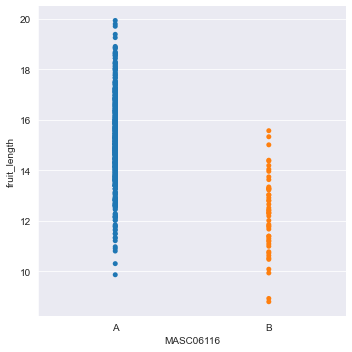

In [60]:
sns.catplot(x="MASC06116", y="fruit_length", data=fruit_length_geno, jitter =False)

**Exercise 1.2**: what happened now? Explain the purpose of the `jitter`. What is the default value for `jitter`

In [ ]:
# Separates the data, so observations don't overlay

### 1.2 Box plot
Using the same `catplot` function we can do other plots.

Here's a box plot. Box plot legend [here](https://wilkelab.org/SDS375/slides/visualizing-distributions-2.html#10).


<img src="attachment:771262b2-751c-4e64-9366-ad3b7d639c70.png" width="400">

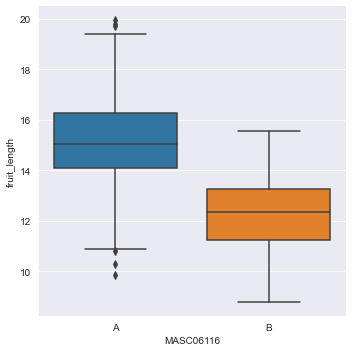

In [61]:
sns.catplot(y="fruit_length", x="MASC06116", kind="box", data=fruit_length_geno)

**Exercise 1.3**: get the fruit length data for the plants with genotype of A at marker MASC06116. Run the `describe` function on this Series to compare the results to the box plot above

In [66]:
fruit_length_geno.loc[:, ('fruit_length', 'MASC06116')].groupby('MASC06116').describe()

fruit_length                                                       
                 count       mean       std   min    25%    50%    75%    max
MASC06116                                                                    
A                625.0  15.148368  1.643411  9.86  14.11  15.06  16.27  19.94
B                 49.0  12.301429  1.541018  8.79  11.22  12.34  13.27  15.57

We can also flip the axes:

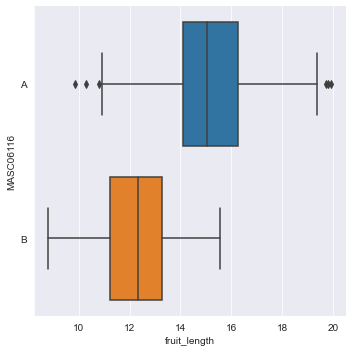

In [68]:
sns.catplot(x="fruit_length", y="MASC06116", kind="box", data=fruit_length_geno)

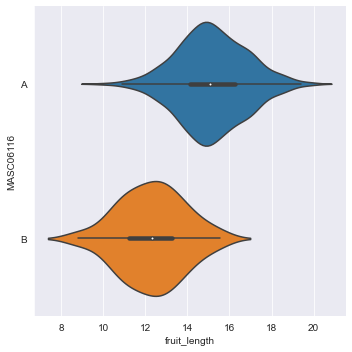

In [67]:
sns.catplot(x="fruit_length", y="MASC06116", kind="violin", data=fruit_length_geno)

**Exercise 1.4**: Compare the violin plot above to the box plot, the strip plots, and the previous histogram we made (copied below). What's the same? What's different?

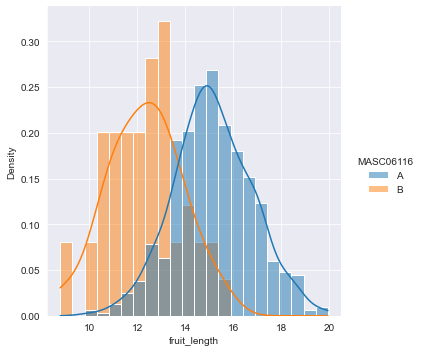

In [69]:
sns.displot(data=fruit_length_geno, x="fruit_length", hue='MASC06116',stat='density',common_norm=False, kde=True)

In [71]:
# the box plot is a rough estemation of the violin plot which looks like the histogram (but smaller and overlayed inverted onto itselve)
fruit_length_geno.columns

Index(['Unnamed: 0', 'bolting_days', 'seed_weight', 'seed_area',
       'ttl_seedspfruit', 'branches', 'height', 'pc_seeds_aborted',
       'fruit_length', 'MN1_29291',
       ...
       'MN5_26029439', 'MN5_26121184', 'MN5_26220737', 'MN5_26379737',
       'MN5_26380009', 'MN5_26437895', 'MN5_26438023', 'MN5_26708459',
       'MN5_26877341', 'MN5_26877463'],
      dtype='object', length=1260)

**Exercise 1.5**: Look through the [documentation](https://seaborn.pydata.org/tutorial/categorical.html#categorical-scatterplots) of various options of Seaborn plots for a catagorical with a number feature. Make one other plot involving a categorical and a number feature, of your choosing, using any of the data sets.

## Further reading
See this [free book](https://clauswilke.com/dataviz) to learn more ideas about good data visualization. Unfortunately, mostly in R!

Also [Edward Tufte](https://www.edwardtufte.com/tufte/) is a famous data visualization expert.

## 2. Introducing types of variables

I already mentioned another word for a feature is a variable.

While variables in programming are placeholders for specific values, the word is taken from statistics or math where a variable is a placeholder for a number that can take on certain values.

By gathering **observations** we are learning about these **variables**. In the end we don't care about the particular 677 plants, we only care about the biology of how genotype shapes phenotype.

**Exercise 2.1**: Let's say we got 400 new plants. What do you expect to see when you look at the data for these new plants on MASC06116 and fruit_length

Generally, in a DataFrame, we have features that are all of one variable type (as in our `lakes` dataframe columns).

**Exercise 2.2**: For each of the following variables, describe:

- Minimum value (if any)
- Maximum value (if any)
- One kind of value that is not valid

A. `Columba_pulchricollis` (counts data frame):

B. `MN5_26437895` (geno data frame)

C. `fruit_length` (pheno data frame)

D. `native_name` (lakes data frame)

E. `shared_canada` (lakes data frame)

**Exercise 2.3**: Create a histogram (distribution plot) for fruit_length and for MASC06116. Describe what is similar and what different about the axes and other characteristics of these two plots.

**Exercise 2.4**: Use the `describe` function on both features. How is the result of `describe` different between the 2? Compare the results to the histogram you just made.

A **distribution** describes how commonly different values of a feature are.

For numbers, they are often a "bell curve" (no relation to the book), such as things like:
- total number of birds in a forest
- fruit length
- human height

Sometimes they are not a bell curve but have other shapes, but the bell curve is very common because, intuitively, many variables have a "very common" value, a "somewhat common but high" and "somewhat common but low" value. Also, many variables have roughly symmetric likelihood fof seeing aa value.

**Exercise 2.5**: Describe what is a "very common", "somewhat common but high", and "very high" value for fruit length

**Exercise 2.6**: If you got a new plant at random, what do you think is the approximate chance the  plant's genotype at  MASC06116  will be an A?